<a href="https://colab.research.google.com/github/carterc64/CS-472-Intro-to-AI/blob/main/NumberImageRecognitionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect notebook to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import trainSet data from MyDrive/data/mnist




In [43]:
import pandas as pd

trainSet = pd.read_csv("/content/drive/MyDrive/data/mnist/mnist_train.csv")
trainSet.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Transfrom data into numpy array, and split the label were predicting into train_YFull and pixel data into train_XFull

In [4]:
import numpy as np

train_XFull = np.array(trainSet.drop("label", axis=1))
train_YFull = np.array(trainSet["label"].copy())


The data is now put into 28,28 arrays

In [44]:
train_XFull

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Here I look inside one of the one of the entries to look at the inner values and notice they range from 0-255

In [45]:
train_XFull[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [42]:
train_XFull.dtype

dtype('int64')

train_YFull is not set as one area with the numbers the x data is representing

In [7]:
train_YFull

array([5, 0, 4, ..., 5, 6, 8])

Here I look at the shap of both to make sure all the data made it through

In [8]:
train_XFull.shape

(60000, 784)

In [9]:
train_YFull.shape

(60000,)

Now I import the test set

In [10]:

testSet = pd.read_csv("/content/drive/MyDrive/Data/mnist/mnist_test.csv")
testSet.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Convert the test set into test_y which has the labels for the x data and the pixel data into test_x

In [11]:
test_x = np.array(testSet.drop("label", axis=1))
test_y = np.array(testSet["label"].copy())

Test to make sure they were converted

In [12]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
test_y

array([7, 2, 1, ..., 4, 5, 6])

Look at the shape to make sure all data made it through

In [14]:
test_x.shape

(10000, 784)

In [15]:
test_y.shape

(10000,)

I now split the data to create a validation set of the last 5000 values of the train_x and train_y

In [16]:
train_x, train_y= train_XFull[:-5000], train_YFull[:-5000]
valid_x, valid_y = train_XFull[-5000:], train_YFull[-5000:]

I check the shape of the train and validation sets to make sure everything worked properly 

In [17]:
train_x.shape

(55000, 784)

In [18]:
train_y.shape

(55000,)

In [19]:
valid_x.shape

(5000, 784)

In [20]:
valid_y.shape

(5000,)

The values shown in train_XFull[0] have a range of 0-255 so I scale the train_x, valid_x and test_x values to all have 0-1 values

In [21]:
train_x = train_x/255
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
valid_x = valid_x/255
valid_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
test_x = test_x/255
test_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Here I generated display graphics of the first 3 train_x data and compared them to their train_y counterparts

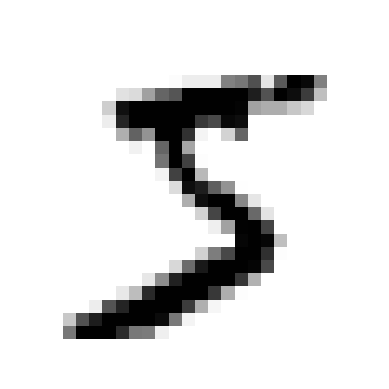

In [24]:
import matplotlib.pyplot as plt

digit1 = train_x[0]
plt.imshow(digit1.reshape(28,28), cmap = "binary")
plt.axis("off")
plt.show()


In [25]:
train_y[0]

5

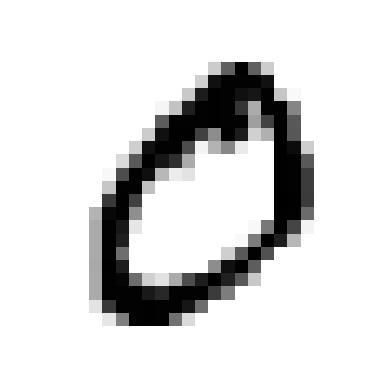

In [26]:
digit2 = train_x[1]
plt.imshow(digit2.reshape(28,28), cmap = "binary")
plt.axis("off")
plt.show()

In [27]:
train_y[1]

0

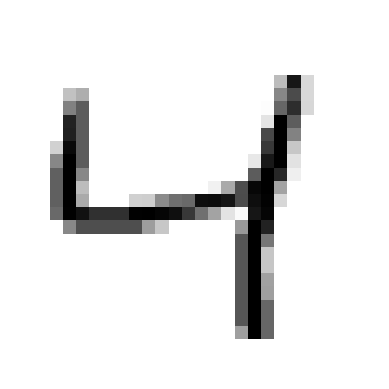

In [28]:
digit3 = train_x[2]
plt.imshow(digit3.reshape(28,28), cmap = "binary")
plt.axis("off")
plt.show()

In [29]:
train_y[2]

4

Here I set up a network model with input_shape 784 as that was the shape I discovered with train_XFull.shape and use flatten just in case it needs flattened, I use 10 in the final layer as we have 10 possible categories (0,1,2,3,4,5,6,7,8,9), since we are trying to categoricaly anaylze the data I use softmax for that layer, then look at the summary of the created model

In [30]:
import tensorflow as tf

tf.random.set_seed(39)

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = [784]),
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
        ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers

Here I complie the model with sparse_categorical_crossentropy as were trying to put the train_x data into 10 catergories with metric as accuracy since thats what were measuring, I then train the model with the train sets and validation sets with 30 epochs, as I didn't want it to take to long and I believe thats what was used in the lecture

In [32]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

fit = model.fit(train_x, train_y, epochs = 30, validation_data = (valid_x, valid_y))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6838 - accuracy: 0.8182 - val_loss: 0.2770 - val_accuracy: 0.9238
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3168 - accuracy: 0.9088 - val_loss: 0.2182 - val_accuracy: 0.9358
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2638 - accuracy: 0.9240 - val_loss: 0.1909 - val_accuracy: 0.9496
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2287 - accuracy: 0.9346 - val_loss: 0.1673 - val_accuracy: 0.9554
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2016 - accuracy: 0.9424 - val_loss: 0.1534 - val_accuracy: 0.9580
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1801 - accuracy: 0.9483 - val_loss: 0.1428 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1626 - accuracy: 0.9531 - val_loss: 0.1293 - val_accuracy

Here I graph the accuracy over each epoch, I notice the accuracy started low and quickly picked up till about 92% then slowly climbed to the high 98%, while the validation accuracy started at aroaund 92 and plateaued around 97, the training accuracy actually goes past the validation in later epochs showing slight overfitting of the data

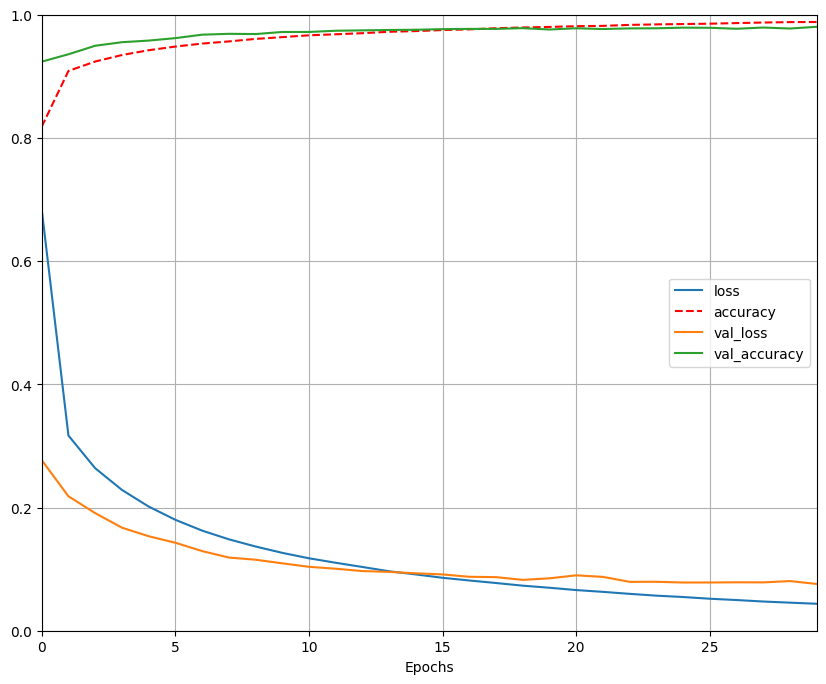

In [33]:
pd.DataFrame(fit.history).plot(xlim = [0,29], ylim = [0, 1], xlabel = "Epochs", grid = True, style = ["","r--"], figsize = [10, 8])
plt.show()

I now evaluate the model on the test set 

In [34]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9755


[0.07996898144483566, 0.9754999876022339]

Here I got 97.5% accuracy on the test set which is .5% lower than the validation set 

I now use the model to predict the first 3 values of the test set and then display the graphics, I just do this for to see the model in action 

In [35]:
predict_x = test_x[:3]
predict_y = model.predict(predict_x)
predict_y.round(2)

1/1 [==============================] - 0s 110ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
predicted_y = predict_y.argmax(axis = -1)
predicted_y

array([7, 2, 1])

In [37]:
correct = test_y[:3]
correct

array([7, 2, 1])

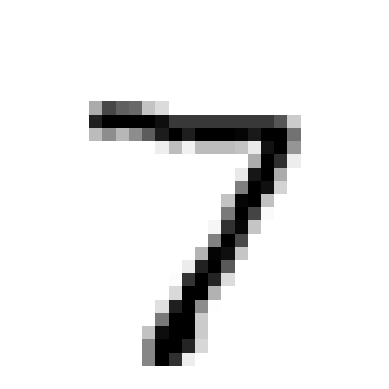

In [38]:
digit1 = test_x[0]
plt.imshow(digit1.reshape(28,28), cmap = "binary")
plt.axis("off")
plt.show()

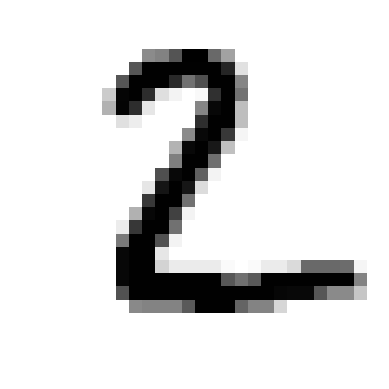

In [39]:
digit2 = test_x[1]
plt.imshow(digit2.reshape(28,28), cmap = "binary")
plt.axis("off")
plt.show()

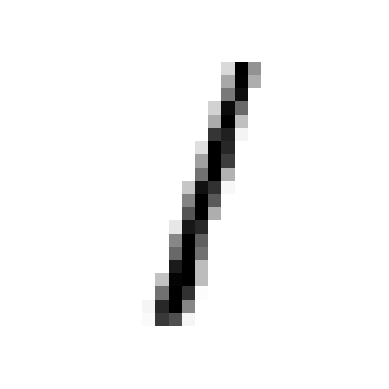

In [40]:
digit3 = test_x[2]
plt.imshow(digit3.reshape(28,28), cmap = "binary")
plt.axis("off")
plt.show()

I would say my model did pretty well, 97.5% on the the test set is a pretty resonable accuracy. My model did seem to platue at around 97% accuracy but was still very slighty increasing in accuracy. I wouldn't recomend deployment into the real world. I feel a couple of small tweaks could make the model more accurate. Such as increasing the number of neurons in each layer as well as more epochs could increase the accuracy of the model. 